In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

In [2]:
from scipy import stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

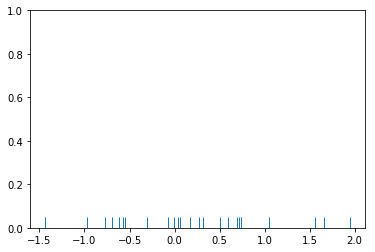

In [6]:
dataset = randn(25)
sns.rugplot(dataset)
#plt.ylim(0,1)

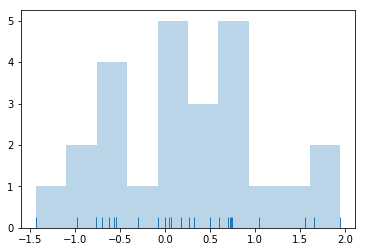

In [7]:
plt.hist(dataset, alpha=0.3)  #Counts the number of ticks in each bin
sns.rugplot(dataset)

(0, 1)

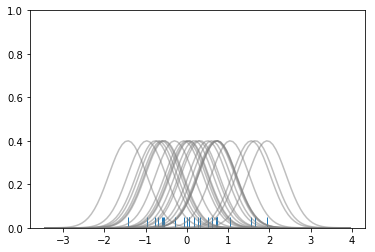

In [8]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []
for data_point in dataset:
    #Create a kernel for each point and append it to the kernel list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

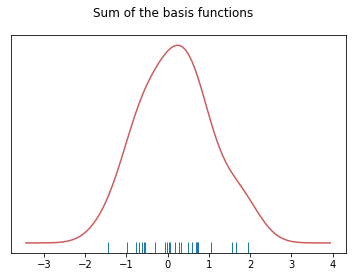

In [10]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


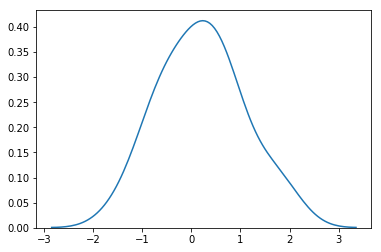

In [11]:
sns.kdeplot(dataset)

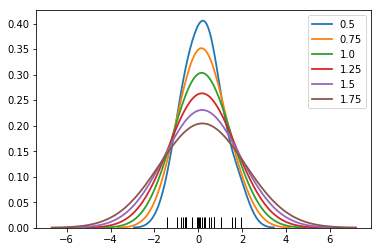

In [12]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)


C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


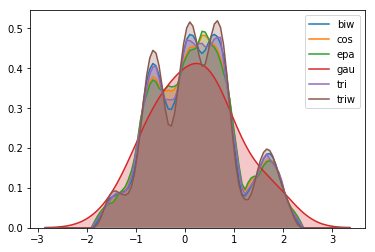

In [15]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True)

C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


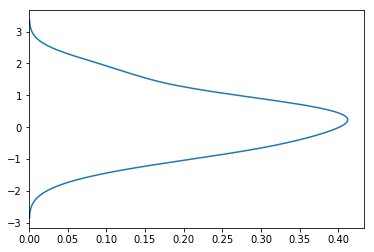

In [16]:
sns.kdeplot(dataset, vertical=True)

C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


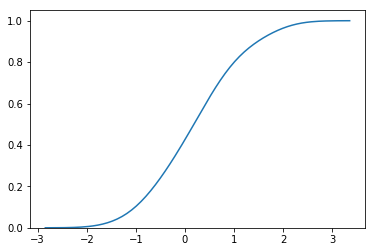

In [17]:
sns.kdeplot(dataset, cumulative=True)

C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


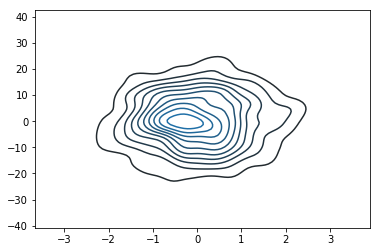

In [18]:
#KDEplot for multidimensional data
mean = [0,0]
cov = [[1,0], [0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
df = pd.DataFrame(dataset2, columns=['X','Y'])
sns.kdeplot(df)

C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


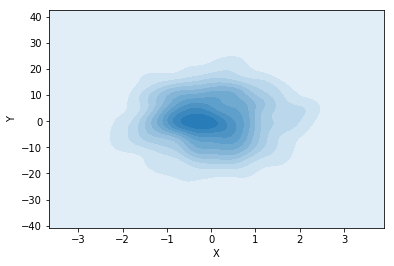

In [20]:
sns.kdeplot(df.X, df.Y, shade=True)

C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


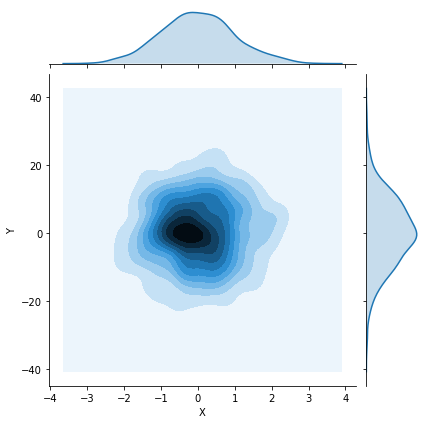

In [21]:
sns.jointplot('X','Y',df, kind='kde')